In [1]:
import numpy as np
import qutip as q
from matplotlib import pyplot as plt

C:\Program Files (x86)\Python36\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


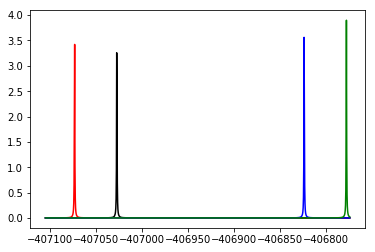

In [9]:
a = q.basis(4,0)
b = q.basis(4,1)
c = q.basis(4,2)
d = q.basis(4,3)

gss = 46
ess = 250
c0 = 299792458
nu0 = c0/736.91
h = 6.626e-34
kB = 1.38e-23
T = 8
boltzmann_g = np.exp(-h*gss/(kB*T))
boltzmann_e = np.exp(-h*ess/(kB*T))

HSys = gss*b*b.dag() + nu0*c*c.dag() + (nu0+ess)*d*d.dag()

Gamma_pht = 1/(2*np.pi*1.7)
Gamma_phn_g = 1/(2*np.pi*40)
Gamma_phn_e = 1/(2*np.pi*1)

Gamma_a = np.sqrt(Gamma_phn)*b*a.dag()
Gamma_b = np.sqrt(Gamma_phn*boltzmann_g)*a*b.dag()
Gamma_c = (np.sqrt(Gamma_pht)*(a+b) + np.sqrt(Gamma_phn_e*boltzmann_e)*d)*c.dag()
Gamma_d = (np.sqrt(Gamma_pht)*(a+b) + np.sqrt(Gamma_phn_e)*c)*d.dag()

c_ops = [Gamma_a, Gamma_b, Gamma_c, Gamma_d]

nus = np.linspace(-c0/737, -c0/736.4, 1e3)

A = a*d.dag()
B = b*d.dag()
C = a*c.dag()
D = b*c.dag()

spectr_A = q.spectrum(HSys, nus, c_ops, A, A.trans())
plt.plot(nus, spectr_A, '-r')

spectr_B = q.spectrum(HSys, nus, c_ops, B, B.trans())
plt.plot(nus, spectr_B, '-k')

spectr_C = q.spectrum(HSys, nus, c_ops, C, C.trans())
plt.plot(nus, spectr_C, '-b')

spectr_D = q.spectrum(HSys, nus, c_ops, D, D.trans())
plt.plot(nus, spectr_D, '-g')

In [86]:
np.mean(np.abs(np.diff(nus)))
Gamma_pht

0.09362055475993844